In [14]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import pickle
import shap
from sklearn.model_selection import train_test_split, StratifiedKFold
import warnings
from sklearn.tree import DecisionTreeClassifier

X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)

# create a train/test split
random_state = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

clf = DecisionTreeClassifier()
model = clf.fit(X_train, y_train)

In [25]:
explainer = shap.TreeExplainer(model)

expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

select = range(20)
features = X_test.iloc[select]
features_display = X_display.loc[features.index]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Explainer expected value: [0.75894502 0.24105498]


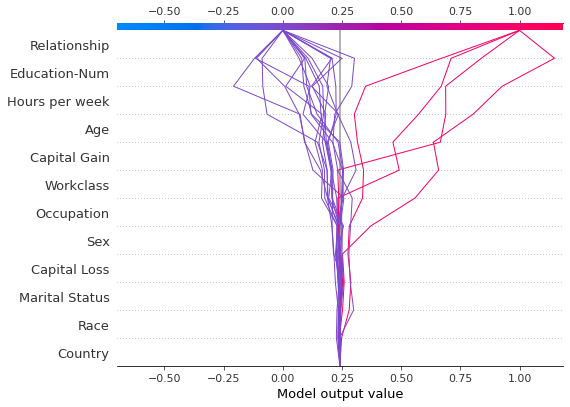

In [26]:
shap.decision_plot(expected_value[1], shap_values, features_display)